<a href="https://colab.research.google.com/github/HuanAII/HuanAII/blob/main/BackGroundSubStraction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
def computeDifference(image1,image2):
  diff=cv2.absdiff(image1,image2)#Ham tru giua 2 hinh anh
  #diff=np.abs(img1.astype(float)-white.astype(float))
  diff_single_channel=np.sum(diff,axis=2)/3.0
  #có mục đích tính trung bình của các giá trị màu trong ảnh đa kênh (như ảnh RGB) để chuyển đổi nó thành ảnh đơn kênh (grayscale).
  diff_single_channel=np.uint8(diff_single_channel)
  return diff_single_channel

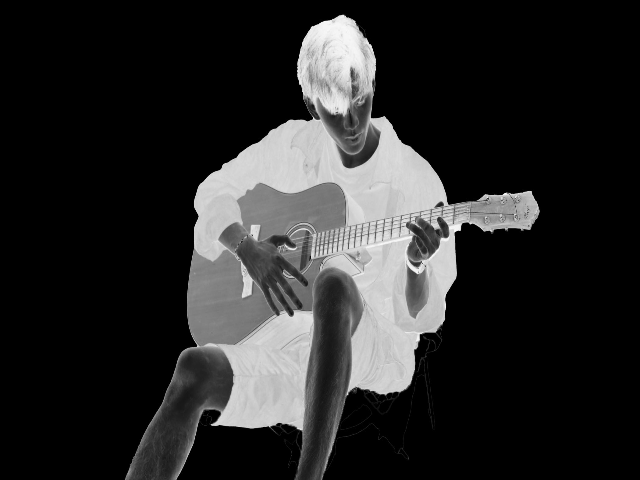

In [ ]:
picture=computeDifference(image1,white_image)
cv2_imshow(picture)

In [ ]:
def computeMask(diff_single_channel):
  pictureResult=np.where(diff_single_channel>=15,255,0)
  print(pictureResult.shape)#in ra kich thuoc cua anh
  pictureResult=np.stack((pictureResult,)*3,axis=-1)
  #axis = -1 no giup xep thanh ma tran theo hang doc
  return pictureResult

In [ ]:
def replaceBackGround(image1,white_image,image3):
  diff_single_channel=computeDifference(image1,white_image)
  binary_mask=computeMask(diff_single_channel)
  output=np.where(binary_mask==255,image1,image3)
  return output


(480, 640)


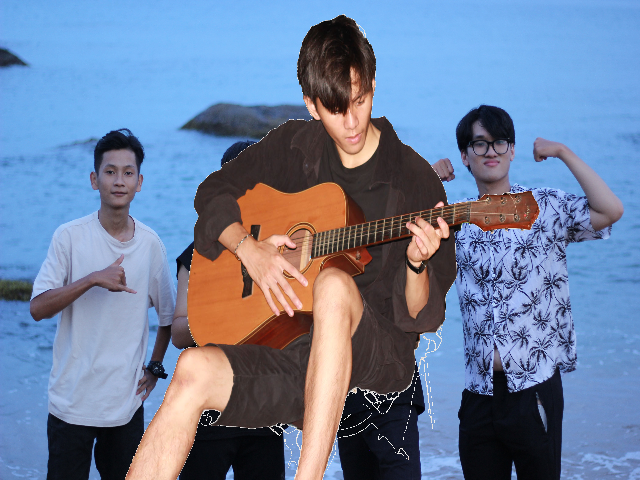

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
image1=cv2.imread('/content/Untitled-1.jpg',1)
image1=cv2.resize(image1,(640,480))
white_image = np.full((480, 640, 3), 255, dtype=np.uint8)

# Lưu ảnh
cv2.imwrite('white_image_640x400_cv2.png', white_image)
image3=cv2.imread('/content/IMG_1096.JPG',1)
image3=cv2.resize(image3,(640,480))
ouput=replaceBackGround(image1,white_image,image3)
cv2_imshow(ouput)